In [2]:
import gym

env = gym.make('MountainCar-v0')
print(env.observation_space)
print(env.action_space.sample())
print(env.action_space.n)
print(env.observation_space.low)
print(env.observation_space.high)

print(env._max_episode_steps)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
1
3
[-1.2  -0.07]
[0.6  0.07]
200


KeyboardInterrupt: 

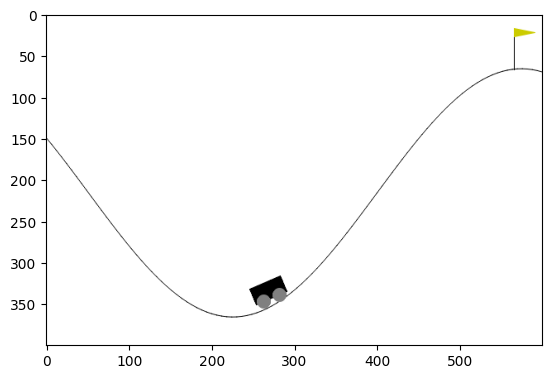

In [12]:
import gym
from IPython import display
import matplotlib.pyplot as plt

env = gym.make('MountainCar-v0', render_mode="rgb_array")
env.reset()
while True:
    screen = env.render()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.imshow(screen)
    env.step(2)
plt.close()
env.close()




In [2]:
import gym

gym.envs.registry.keys()

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4'])

In [6]:
def tiling(obs, num_tile=8, place_bound=(-1.2, 0.5), speed_bound=(-0.07, 0.07)):
    plc_offset = (place_bound[1]-place_bound[0])/(num_tile*(num_tile-1)+1)
    spd_offset = (speed_bound[1]-speed_bound[0])/(num_tile*(num_tile-1)+1)
    feature_vector = []
    for i in range(num_tile):
        feature_vector.append(((obs[0] - (place_bound[0] + (1-num_tile+i)*plc_offset))/(plc_offset*num_tile))//1)
        feature_vector.append(((obs[1] - (speed_bound[0] + (1-num_tile+3*i%num_tile)*spd_offset))/(spd_offset*num_tile))//1)
    return feature_vector

In [14]:
import random

place_bound=(-1.2, 0.5)
speed_bound=(-0.07, 0.07)

do = []
ko = []
for _ in range(10):
    h = random.random()
    h = h*1.7 - 1.2
    d = random.random()
    d = d*0.14 - 0.07
    print(h, d)
    print(tiling((h, d)))
    do.append(h)
    ko.append(tiling((h, 0)))
hja = [1, 2, 3]



-0.16009140903246522 -0.035045902853733706
[5.0, 2.0, 5.0, 2.0, 4.0, 1.0, 4.0, 2.0, 4.0, 2.0, 4.0, 1.0, 4.0, 2.0, 4.0, 2.0]
-0.970635884098026 -0.02884382282847188
[1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 0.0, 2.0]
0.27631281938436003 0.02957777912111645
[7.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0]
-1.1872917896439283 0.04331604288904069
[0.0, 6.0, 0.0, 6.0, 0.0, 5.0, 0.0, 6.0, 0.0, 6.0, 0.0, 5.0, 0.0, 6.0, 0.0, 6.0]
-0.6590041059511009 0.019011097260735965
[3.0, 5.0, 3.0, 5.0, 2.0, 4.0, 2.0, 5.0, 2.0, 4.0, 2.0, 4.0, 2.0, 5.0, 2.0, 4.0]
-1.0590994742106488 0.035425260056722585
[1.0, 6.0, 1.0, 5.0, 1.0, 5.0, 1.0, 6.0, 0.0, 5.0, 0.0, 5.0, 0.0, 5.0, 0.0, 5.0]
-0.12960637456329005 0.026990526813057525
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0]
-0.18434687258255833 0.06578703296204147
[5.0, 7.0, 5.0, 7.0, 4.0, 7.0, 4.0, 7.0, 4.0, 7.0, 4.0, 6.0, 4.0, 7.0, 4.0, 7.0]
-0.6830767268998248 -0.0

TypeError: list indices must be integers or slices, not float

In [9]:
import numpy as np
action = 0
state_vector = [2, 3]
feature_vector = np.zeros(len(state_vector)*3)
feature_vector[action*len(state_vector):(action+1)*len(state_vector)] = state_vector
print(feature_vector)

[2. 3. 0. 0. 0. 0.]


In [53]:
num_tile = 8
place_bound=(-1.2, 0.5)
speed_bound=(-0.07, 0.07)
plc_offset = (place_bound[1]-place_bound[0])/(num_tile*(num_tile-1)+1)
spd_offset = (speed_bound[1]-speed_bound[0])/(num_tile*(num_tile-1)+1)

obs = (0.5-1*plc_offset, -0.07+56*spd_offset)
obs = (obs[0] + plc_offset/2, obs[1] + spd_offset/2)
obs = (0.5, 0.07)

state_vector = []
for i in range(num_tile):        
    projected_place = (obs[0] - (place_bound[0] + (1-num_tile+i)*plc_offset))/(plc_offset*num_tile)
    projected_speed = (obs[1] - (speed_bound[0] + (1-num_tile+3*i%num_tile)*spd_offset))/(spd_offset*num_tile)
    state_vector.append(projected_place//1)
    if projected_speed == num_tile:
        state_vector.append(num_tile-1)
    else:
        state_vector.append(projected_speed)

print(state_vector)

[8.0, 7, 7.0, 7.625000000000002, 7.0, 7.250000000000002, 7.0, 7.875000000000001, 7.0, 7.5, 7.0, 7.125, 7.0, 7.749999999999999, 7.0, 7.374999999999999]


In [4]:
import gym
from hw3_utils import functionApproximation
agent = functionApproximation

agent = functionApproximation(8, 0, 0.1/8, 1, 1E-4, env= gym.make('MountainCar-v0', render_mode="rgb_array"))
a = (0.5, 0.07)
print(agent.featureVector(a, 2))

from hw3_utils import tiles, IHT
iht = IHT(4096)
print(tiles(iht, 8, [8*a[0]/1.7, 8*a[1]/0.14], [2]))
print(iht, agent.iht)

[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
Collision table: size:4096 overfullCount:0 dictionary:8 items Collision table: size:4096 overfullCount:0 dictionary:8 items


In [5]:

print(agent.featureVector(a, 2))
print(tiles(iht, 8, [8*a[0]/1.7, 8*a[1]/0.14], [1]))
print(iht, agent.iht)

[0, 1, 2, 3, 4, 5, 6, 7]
[8, 9, 10, 11, 12, 13, 14, 15]
Collision table: size:4096 overfullCount:0 dictionary:16 items Collision table: size:4096 overfullCount:0 dictionary:8 items


In [6]:

print(agent.featureVector(a, 2))
print(tiles(iht, 8, [8*a[0]/1.7, 8*a[1]/0.14], [0]))
print(iht, agent.iht)

[0, 1, 2, 3, 4, 5, 6, 7]
[16, 17, 18, 19, 20, 21, 22, 23]
Collision table: size:4096 overfullCount:0 dictionary:24 items Collision table: size:4096 overfullCount:0 dictionary:8 items


In [33]:
a = (-0.5, -0.07)
featureVector(a, [2], iht)

[109, 102, 110, 111, 105, 112, 113, 108]

In [45]:
a = ["me, ho", 'hi', 'good']
with open("./hi.csv", 'w') as f:
    for b in a:
        f.write(b+"\n")

with open("./hi.csv", 'r') as f:
    print(f.readlines()[0].split(','))

['me', ' ho\n']


In [46]:
a = "HH\n"
a.strip()

4096

In [1]:
a = ["bb", "aa", "aab", "aac", "aad"]
for d in a:
    if "aa" in d:
        print(d)

aa
aab
aac
aad


In [11]:
import numpy as np
d = [3.3, 3.55, -6.89, 7.26]
a = np.array(d).astype(np.string_)
a = a.astype(np.float32)
print(a - d)

[-4.76837156e-08 -4.76837156e-08  1.33514404e-07  2.28881836e-07]


In [29]:
X = np.arange(0, 10, 1)
Y = np.arange(0, 5, 1)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + Y**2)
print(Z[4, 8])

8.94427190999916


In [30]:
sleep(100)

NameError: name 'sleep' is not defined

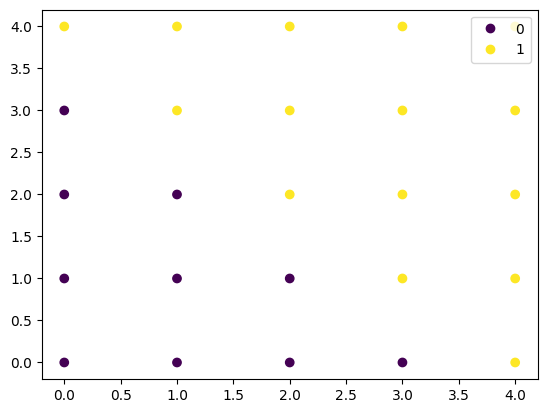

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0, 5, 1)
Y = np.arange(0, 5, 1)
X, Y = np.meshgrid(X, Y)
Z = (X+Y)>3
fig, ax = plt.subplots()
scatter = ax.scatter(X, Y, c=Z)
plt.legend(*scatter.legend_elements(),)
plt.show()